## Paqueterias

In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

## Función de Pagos

In [85]:
def calcular_pagos(jugador1, jugador2):
    cuenta1 = []
    cuenta2 = []
    puntos1 = 0
    puntos2 = 0

    for i in range(len(jugador1)):
        play1 = jugador1[i]
        play2 = jugador2[i]

        if play1 == 1 and play2 == 1: 
            puntos1 += 3
            puntos2 += 3
        elif play1 == 1 and play2 == 0:
            puntos1 += 0
            puntos2 += 5
        elif play1 == 0 and play2 == 1:
            puntos1 += 5
            puntos2 += 0    
        else:
            puntos1 += 1
            puntos2 += 1

        cuenta1.append(puntos1)
        cuenta2.append(puntos2)
    return cuenta1, cuenta2
    

## Creación Juego

In [86]:
random.seed(42)
aleatorio = []

for i in range(20):
    aleatorio.append(np.random.randint(0,2))

def Rick (aleatorio):
    Rick_play = []
    ceros_Rick = 0

    for i in range(0, len(aleatorio)):   
        if i == 0:
            Rick_play.append(1)
        elif ceros_Rick >= 2:
            Rick_play.append(0)
        else:
            Rick_play.append(aleatorio[i-1])
            if aleatorio[i]==0:
                ceros_Rick +=1
            else:
                ceros_Rick = 0
    return Rick_play

def Friedman (aleatorio):
    Friedman_play = []
    ceros_friedman = 0 

    for i in range(0, len(aleatorio)):  
        if  i == 0:
            Friedman_play.append(1) 
        elif ceros_friedman > 0:
            Friedman_play.append(0)  
        else:
            Friedman_play.append(aleatorio[i-1])  
        if aleatorio[i] == 0:
            ceros_friedman +=1
    return Friedman_play

def Joss (aleatorio):
    Joss_play = []
    Joss_play.append(1)

    for i in range(1, len(aleatorio)):
        if (i + 1) % 10 == 0:
            Joss_play.append(0)
        else:
            Joss_play.append(aleatorio[i - 1])
    return Joss_play

def GraasKamp (aleatorio):
    GraasKamp_play = []
    GraasKamp_play.append(1)

    for i in range(1, len(aleatorio)):
        if (i + 1) % 20 == 0:
            GraasKamp_play.append(0)
        else:
            GraasKamp_play.append(aleatorio[i - 1])
    return GraasKamp_play

def Tit_for_Tat (aleatorio):
    Tit_for_tat_play= []
    
    for i in range(0, len(aleatorio)):
        if i == 0:
            Tit_for_tat_play.append(1)
        else:
            Tit_for_tat_play.append(aleatorio[i -1])
    return Tit_for_tat_play

def Tester (aleatorio):
    Tester_plays = []
    Tester_plays.append(0)
    Tester_plays.append(1)  
    if aleatorio[1] == 0:
        for i in range(2, len(aleatorio)):
            Tester_plays.append(aleatorio[i - 1])
    else:
        for i in range(2, len(aleatorio)):
            Tester_plays.append((i-2) % 2) 
    return Tester_plays

def Tit_for_2Tat (aleatorio):
    Tit_for_2Tat_play = []
    ceros = 0
    Tit_for_2Tat_play.append(1)
    for i in range(1, len(aleatorio)):
        if aleatorio[i - 1] == 0:
            ceros += 1
        else :
            ceros = 0
        if ceros == 2:
            Tit_for_2Tat_play.append(1)  
            ceros = 0  
        else:
            Tit_for_2Tat_play.append(aleatorio[i - 1])  

    return Tit_for_2Tat_play

In [87]:
dataframe = pd.DataFrame ({
    'Aleatorio': aleatorio,
    'Friedman': Tit_for_2Tat(aleatorio)
}).T
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Aleatorio,1,1,1,0,1,1,0,1,1,0,0,0,1,0,1,1,0,1,0,1
Friedman,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,0,1,0


## Simulación Juegos

In [ ]:
nombres = ['Rick', 'Friedman', 'Joss', 'GraasKamp', 'Tit_for_Tat', 'Tester',' Tit_for_2Tat']
jugadores = [Rick, Friedman, Joss, GraasKamp, Tit_for_Tat, Tester,Tit_for_2Tat]

df = []

for i in range(len(aleatorio)):
    player = nombres[i]
    funcion = jugadores[i]

    

In [63]:
dataframes = []

for i, jugador in enumerate(jugadores):
    nombre = jugadores_nombres[i]
    pagos_A, pagos_J = calcular_pagos(aleatorio, jugador)
    
    df = pd.DataFrame({
        "Aleatorio": aleatorio,
        nombre: jugador,
        "Pago_Aleatorio": pagos_A,
        f"Pago_{nombre}": pagos_J
    })
    
    dataframes.append(df)
dataframes[1]



,Aleatorio,Friedman,Pago_Aleatorio,Pago_Friedman
0,1,1,3,3
1,1,1,6,6
2,1,1,9,9
3,1,1,12,12
4,0,1,17,13
5,1,0,18,18
6,1,0,19,23
7,0,0,20,24
8,1,0,21,29
9,0,0,22,30


## Gráficas

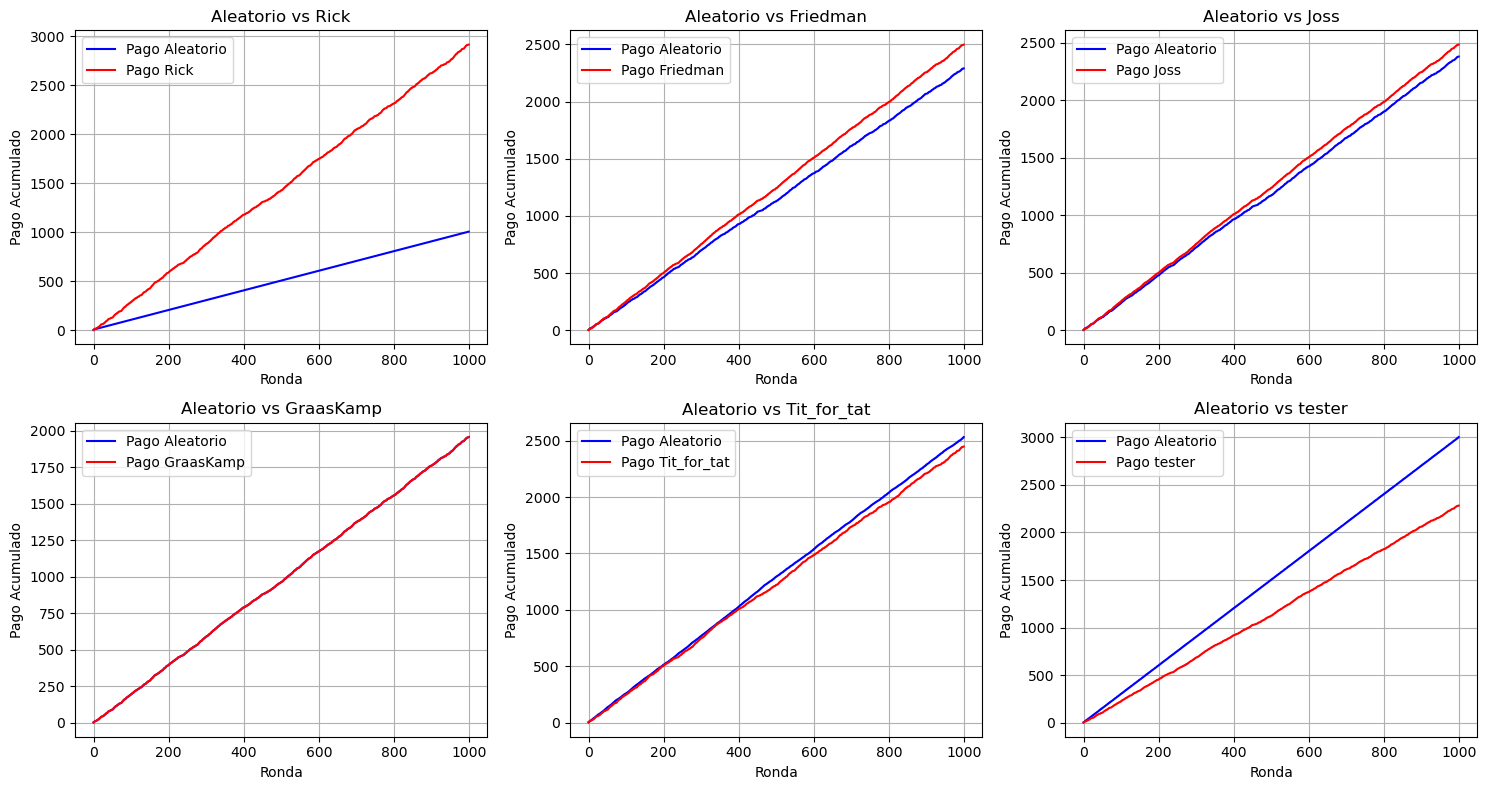

In [53]:
n = len(dataframes)
filas = 2
columnas = (n + 1) // 2  

plt.figure(figsize=(5 * columnas, 8))

for i, df in enumerate(dataframes):
    nombre_jugador = df.columns[1]
    plt.subplot(filas, columnas, i + 1)
    plt.plot(df.index, df["Pago_Aleatorio"], label="Pago Aleatorio", color="blue")
    plt.plot(df.index, df[f"Pago_{nombre_jugador}"], label=f"Pago {nombre_jugador}", color="red")
    
    plt.title(f"Aleatorio vs {nombre_jugador}")
    plt.xlabel("Ronda")
    plt.ylabel("Pago Acumulado")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (6,).

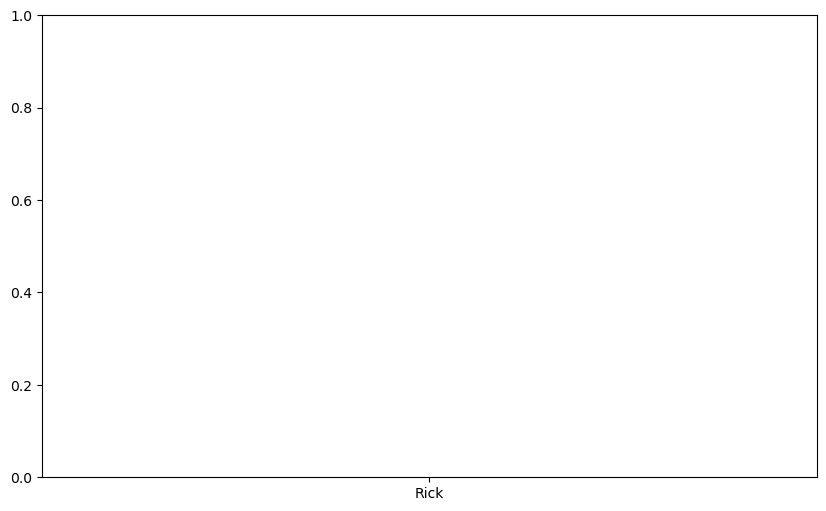

In [54]:
acumulado = []
for i, df in enumerate(dataframes):
    nombre_jugador = df.columns[1]
    puntaje_final = df[f"Pago_{nombre_jugador}"].iloc[-1]  
    acumulado.append(puntaje_final)

plt.figure(figsize=(10, 6))
plt.bar(jugadores_nombres, acumulado, color="skyblue")

plt.title("Puntajes Finales de Cada Jugador")
plt.xlabel("Jugador")
plt.ylabel("Puntaje Acumulado")
plt.grid(True)

# Mostrar gráfico
plt.show()
